In [9]:
import geopandas as gpd
import pandas as pd
import numpy as np
from shapely.geometry import Point, LineString
from shapely.ops import split

In [2]:
gdfRoutes = gpd.read_file('..\\data\\processed\\Routes.shp')
#gdfPoints = gpd.read_file('..\\data\\processed\\biogas_sources.shp')

In [4]:
startPoints = gdfRoutes['geometry'].apply(lambda x: Point(x.coords[0]))
endPoints = gdfRoutes['geometry'].apply(lambda x: Point(x.coords[-1]))

In [5]:
gdfStart = gdfRoutes.copy(deep=True)
gdfStart['geometry'] =startPoints
gdfStart.to_file('../data/processed/starts.shp')

In [7]:
gdfEnd = gdfRoutes.copy(deep=True)
gdfEnd['geometry'] = endPoints
gdfEnd.to_file('../data/processed/ends.shp')

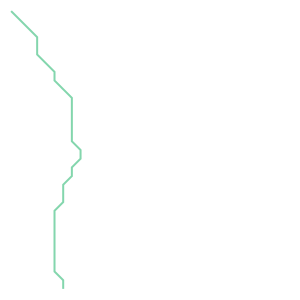

In [8]:
#Iterate through lines and split
theLine = gdfRoutes.at[0,'geometry']
theLine

In [10]:
#Merge end points into single feature
ends = endPoints.unary_union

In [20]:
theSplits = gdfRoutes.geometry.apply(lambda x: split(x,ends))

In [21]:
gdfRoutes['geometry'] = theSplits

In [53]:
all_lines = []
for l in theSplits:
    for lg in l.geoms:
        all_lines.append(lg)

In [54]:
gdfLines = gpd.GeoDataFrame(geometry=all_lines)

In [56]:
gdfLines['id'] = gdfLines.index
gdfLines.to_file('../data/processed/LineSegements.shp')